# Crash Course Lesson 1
## Face Detection with OpenCV and deep learning

pyimagesearch crash course lesson found here: https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/

We can perform fast, accurate face detection with OpenCV using a pre-trained deep learning face detector model that comes with the library

## Face detection in images with OpenCV and deep learning

In [1]:
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import time
from imutils.video import VideoStream


In [13]:
# Set file paths
proto_path = os.getcwd() + '/deploy.prototxt.txt'
model_path = os.getcwd() + '/res10_300x300_ssd_iter_140000.caffemodel'
dodger_path = os.getcwd() + '/dodger_game.jpg'
rooster_path = os.getcwd() + '/rooster.jpg'
iron_path = os.getcwd() + '/iron_chic.jpg'

In [3]:
def display_BGR(image):
    ''' OpenCV stores in BGR rather than RGB. This will convert a BGR image
    into an RGB image and display it
    '''
    im2 = image.copy()
    im2[:, :, 0] = image[:, :, 2]
    im2[:, :, 2] = image[:, :, 0]
    plt.imshow(im2)
    plt.show()

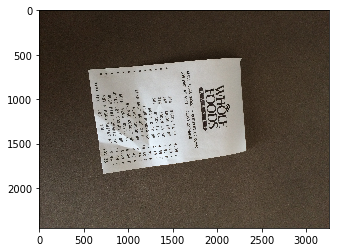

(2448, 3264, 3)


In [26]:
receipt = 'receipt.jpg'
example = 'example_test.png'
dodger = cv2.imread(receipt)
display_BGR(dodger)
print(dodger.shape)


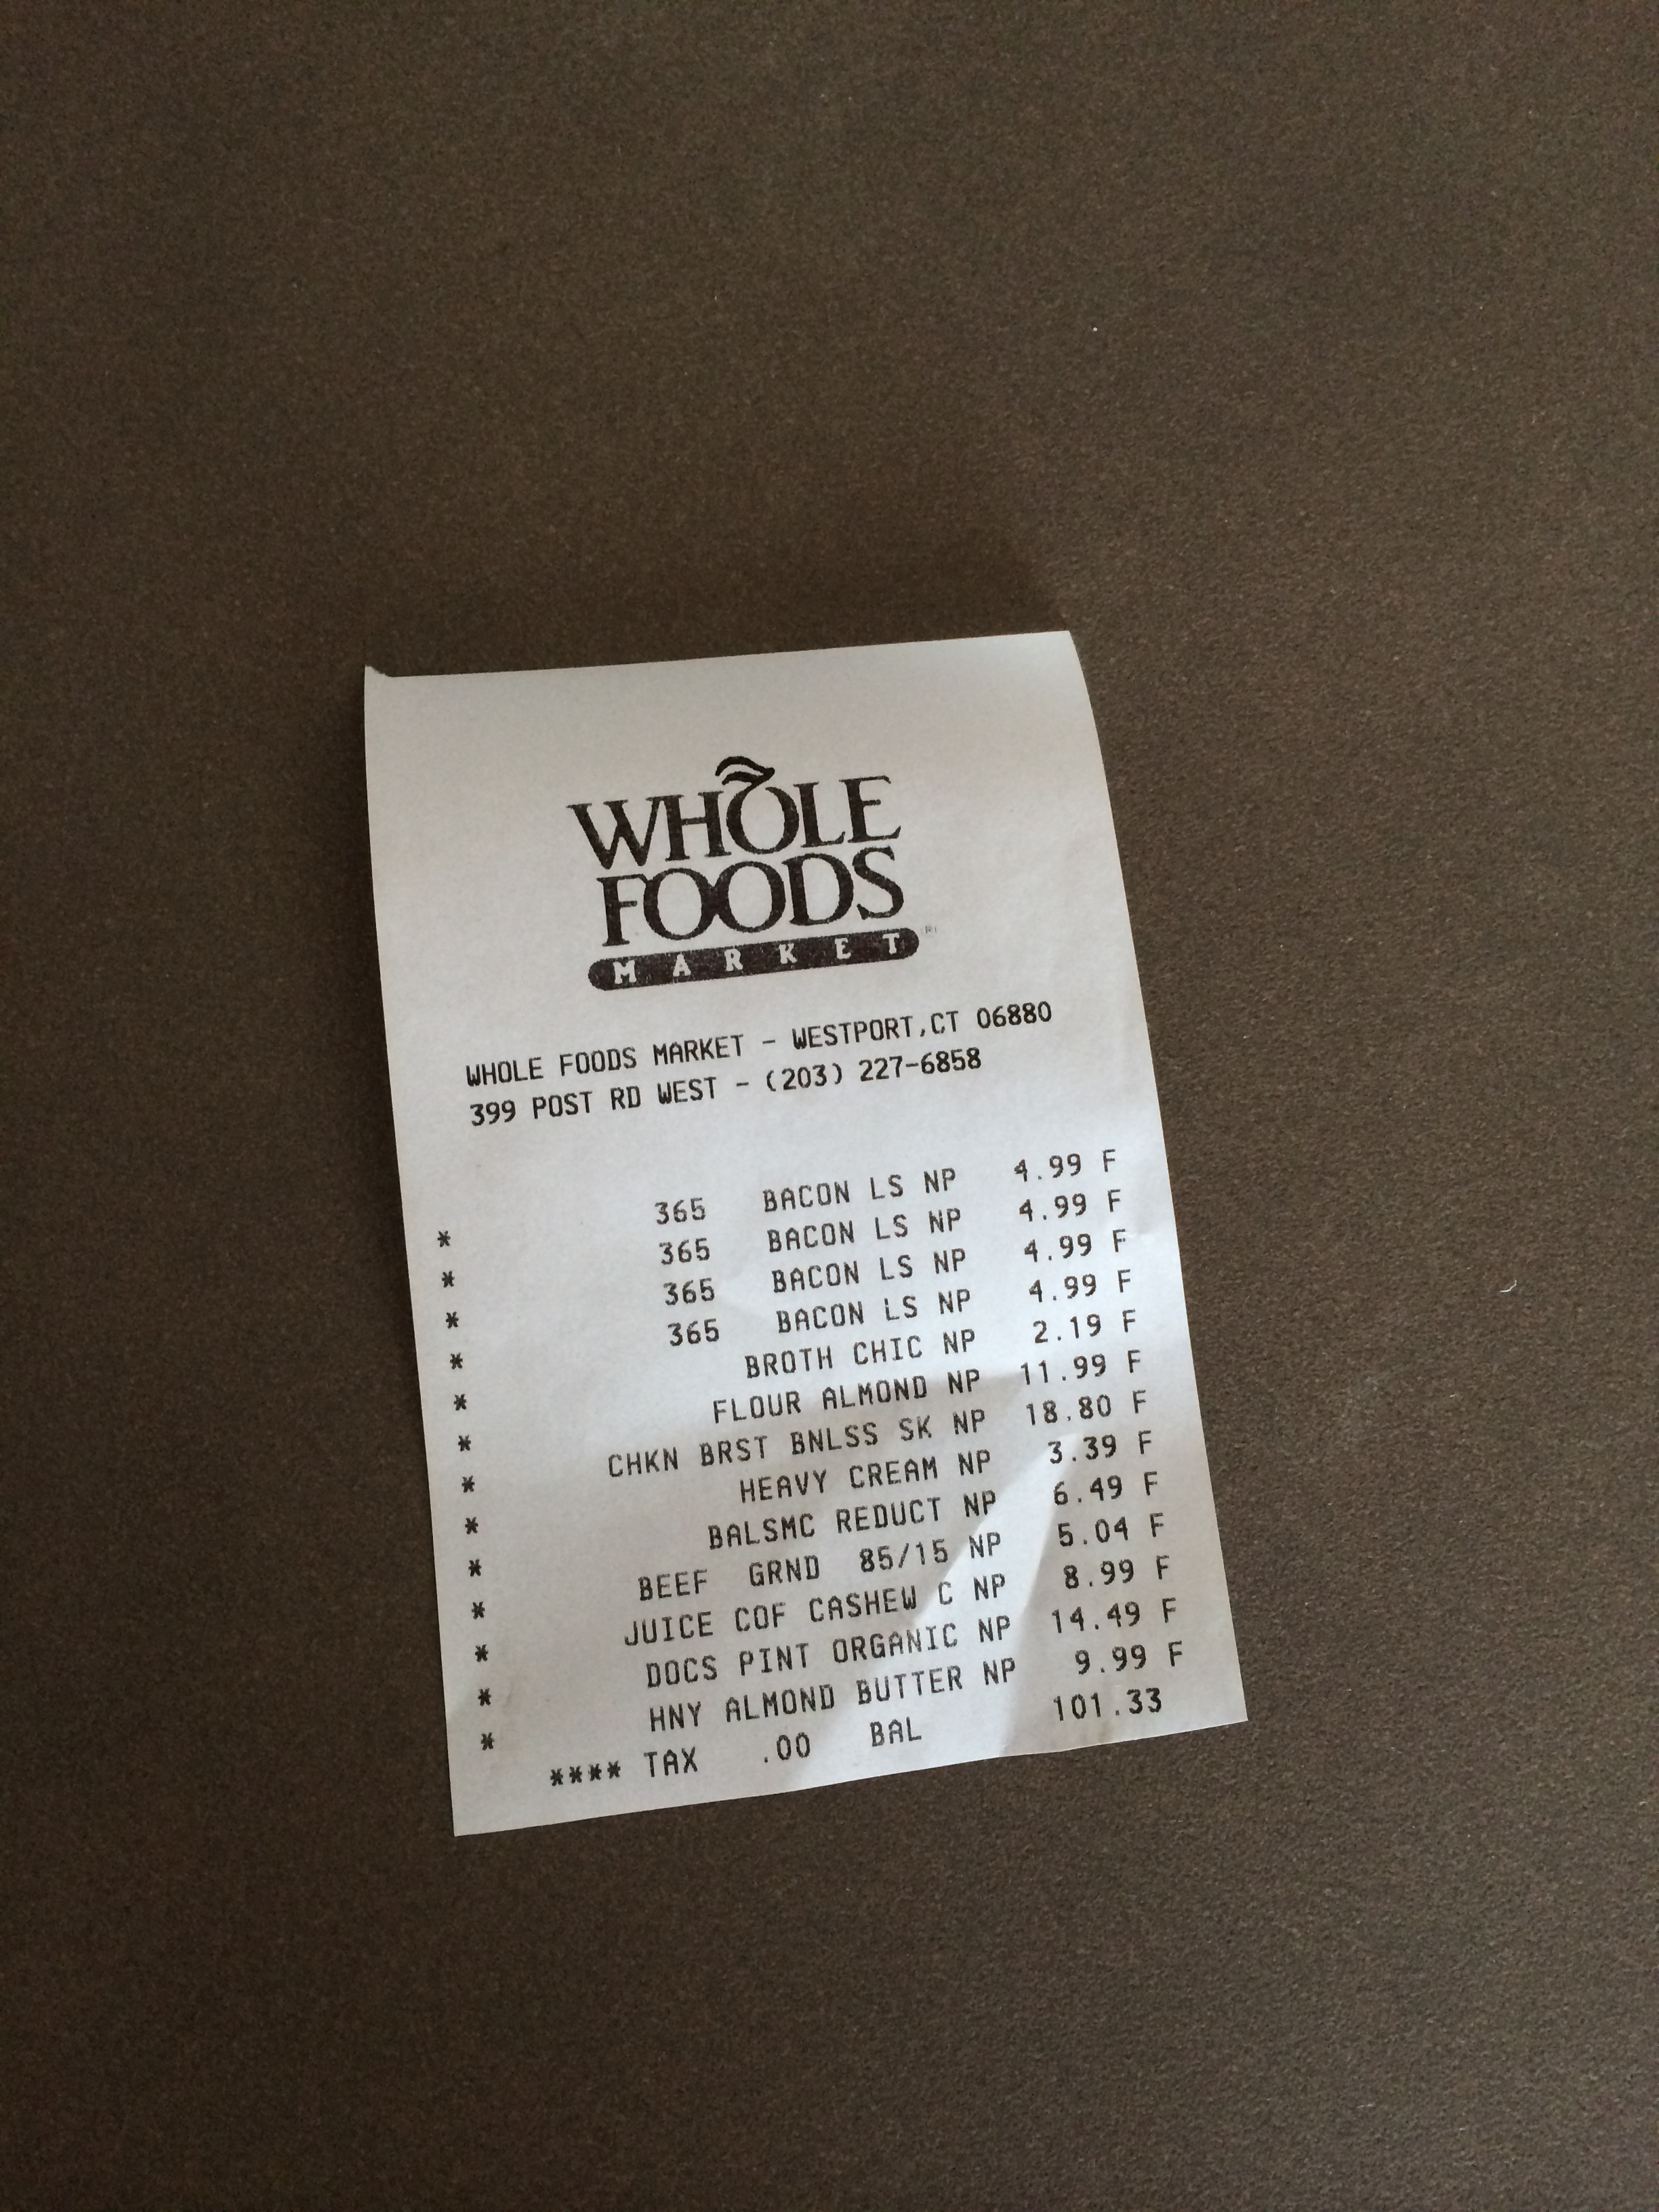

In [27]:
from IPython.display import Image 
Image(filename=receipt)

In [4]:
# Create function for our model

def face_recognition_img(img_path):
    '''
    Argument:
        img_path: path to image
    
    Output:
    '''
    
    # Initialize model
    net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
    
    # Edit image
    image = cv2.imread(img_path)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))
    
    # Detect faces
    net.setInput(blob)
    detections = net.forward()
    
    # Create output image
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            
            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(image, (startX, startY), (endX, endY),
                (0, 0, 255), 2)
            cv2.putText(image, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, .45, (0, 0, 255), 2)
    
    # show the output image
    display_BGR(image)
    


### Test code on my own image and a given image

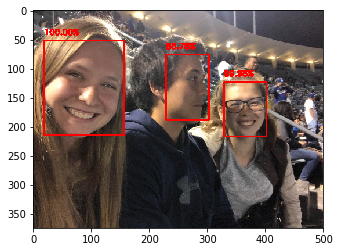

In [5]:
face_recognition_img(dodger_path)

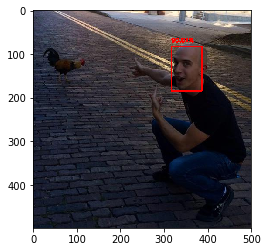

In [82]:
face_recognition_img(rooster_path)

## Face detection in video and webcam with OpenCV and deep learning

We will be using a video stream rather than an image

Notes: we intitialize VideoStream object with index zero, this will be the computer's first camera detected

If you parse a video file rather than a video stream swap out the VideoStream class for FileVideoStream

In [87]:
def face_recognition_vid():
    net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
    vs = VideoStream(src=0).start()
    
    # Give camera warmup time
    time.sleep(2)
    

        
    # loop over the frames from the video stream
    while True:
        # grab the frame from the threaded video stream and resize it
        # to have a maximum width of 400 pixels
        frame = vs.read()
        frame = imutils.resize(frame, width=400)

        # grab the frame dimensions and convert it to a blob
        (h, w) = frame.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
            (300, 300), (104.0, 177.0, 123.0))

        # pass the blob through the network and obtain the detections and
        # predictions
        net.setInput(blob)
        detections = net.forward()
        
        # loop over the detections
        for i in range(0, detections.shape[2]):
            # extract the confidence (i.e., probability) associated with the
            # prediction
            confidence = detections[0, 0, i, 2]

            # filter out weak detections by ensuring the `confidence` is
            # greater than the minimum confidence
            if confidence < 0.5:
                continue

            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),
                (0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
            
        # show the output frame
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break

    # do a bit of cleanup
    cv2.destroyAllWindows()
    vs.stop()

In [ ]:
# Need to run this outside of jupyter notebook for it to interact with it